In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from toolkit.loaders.loader_eth import load_eth

In [207]:
# groups = np.loadtxt(os.path.join("./", "datasets/ETH/seq_eth/groups.txt"))
# neg_data = np.genfromtxt(os.path.join("./", "datasets/ETH/seq_eth/groups.txt"),delimiter = '\n')
# neg_data
# s = set()
# with open (os.path.join("./", "datasets/ETH/seq_eth/groups.txt")) as f:
#     for line in f.readlines():
        


In [154]:

# fixme: replace OPENTRAJ_ROOT with the address to root folder of OpenTraj
traj_dataset = load_eth(os.path.join("./", "datasets/ETH/seq_eth/obsmat.txt"))
trajs = traj_dataset.get_trajectories()


In [155]:
def concat(trajs):
    
    trajs = list(trajs)
    df = trajs[0][1]
    
    for i in range(1, len(trajs)):
        df = pd.concat([df, trajs[i][1]], axis = 0)
    return df
df = concat(trajs)
df

,frame_id,agent_id,pos_x,pos_y,vel_x,vel_y,scene_id,label,timestamp
0,780,1,8.456844,3.588066,1.671714,0.176292,0,pedestrian,52.0
1,786,1,9.125530,3.658583,1.662877,0.326723,0,pedestrian,52.4
2,792,1,9.787146,3.849445,1.683334,0.371084,0,pedestrian,52.8
3,798,1,10.472197,3.955450,1.598568,0.264795,0,pedestrian,53.2
4,804,1,11.066000,4.061280,1.574526,0.456390,0,pedestrian,53.6
...,...,...,...,...,...,...,...,...,...
8879,12357,367,11.201661,8.443910,0.000000,0.000000,0,pedestrian,823.8
8886,12363,367,11.201661,8.443910,0.000000,0.000000,0,pedestrian,824.2
8892,12369,367,11.201661,8.443910,0.000000,0.000000,0,pedestrian,824.6
8898,12375,367,11.201661,8.443910,0.000000,0.000000,0,pedestrian,825.0


In [156]:
df = df.drop(["frame_id", "scene_id", "label"], axis=1)
df

,agent_id,pos_x,pos_y,vel_x,vel_y,timestamp
0,1,8.456844,3.588066,1.671714,0.176292,52.0
1,1,9.125530,3.658583,1.662877,0.326723,52.4
2,1,9.787146,3.849445,1.683334,0.371084,52.8
3,1,10.472197,3.955450,1.598568,0.264795,53.2
4,1,11.066000,4.061280,1.574526,0.456390,53.6
...,...,...,...,...,...,...
8879,367,11.201661,8.443910,0.000000,0.000000,823.8
8886,367,11.201661,8.443910,0.000000,0.000000,824.2
8892,367,11.201661,8.443910,0.000000,0.000000,824.6
8898,367,11.201661,8.443910,0.000000,0.000000,825.0


In [192]:
# data_txt = np.loadtxt(os.path.join("./", "datasets/ETH/seq_eth/obsmat.txt"))
# data_txt_df = pd.DataFrame(data_txt)
# data_txt_df.to_csv('datas_train.csv', index=False)

In [158]:
# df = pd.read_csv("./datas_train.csv")
# df

In [159]:
# df = df.drop("3" ,axis = 1)
# df = df.drop("6", axis = 1)
# df = df.drop("0", axis = 1)


In [106]:
# df.rename(columns= {'1':"pedestrian_id", "2":"pos_x", "4":"pos_y", "5":"v_x", "7":"v_y"}, inplace=True)
# df

In [95]:
x_y = df[["pos_x", "pos_y"]]
x_y_matrix = np.array(x_y)

x_y_matrix

array([[ 8.4568443,  3.5880664],
       [ 9.1255301,  3.6585832],
       [ 9.787146 ,  3.8494445],
       ...,
       [11.201661 ,  8.4439105],
       [11.201661 ,  8.4439105],
       [11.201661 ,  8.4439105]])

In [96]:
import os
import numpy as np

def world2image(traj_w, H_inv):    
    # Converts points from Euclidean to homogeneous space, by (x, y) → (x, y, 1)
    traj_homog = np.hstack((traj_w, np.ones((traj_w.shape[0], 1)))).T  
    # to camera frame
    traj_cam = np.matmul(H_inv, traj_homog)  
    # to pixel coords
    traj_uvz = np.transpose(traj_cam/traj_cam[2]) 
    return traj_uvz[:, :2].astype(int)    

H = (np.loadtxt(os.path.join("./", "datasets/ETH/seq_eth/H.txt")))
H_inv = np.linalg.inv(H)
word_pos = world2image(x_y_matrix, H_inv)  # TRAJ: Tx2 numpy array

In [97]:
df["pos_x"] = word_pos[...,0]
df["pos_y"] = word_pos[...,1]

In [98]:
x_min = df["pos_x"].min()
y_min = df["pos_y"].min()
x_max = df["pos_x"].max()
y_max = df["pos_y"].max()
print(x_min)
print(x_max)
print(y_min)
print(y_max)

15
464
133
479


In [160]:
df_1 = df[df["agent_id"].isin([1,2])]
df_1

,agent_id,pos_x,pos_y,vel_x,vel_y,timestamp
0,1,8.456844,3.588066,1.671714,0.176292,52.0
1,1,9.125530,3.658583,1.662877,0.326723,52.4
2,1,9.787146,3.849445,1.683334,0.371084,52.8
3,1,10.472197,3.955450,1.598568,0.264795,53.2
4,1,11.066000,4.061280,1.574526,0.456390,53.6
6,1,11.731818,4.320563,1.644127,0.544391,54.0
8,1,12.381302,4.496793,1.623709,0.440576,54.4
5,2,13.017548,5.782591,-2.324444,-0.076606,53.6
7,2,12.087770,5.751949,-1.589052,-0.065971,54.0
9,2,11.746306,5.729815,-1.140766,0.105373,54.4


<AxesSubplot:xlabel='pos_x', ylabel='pos_y'>

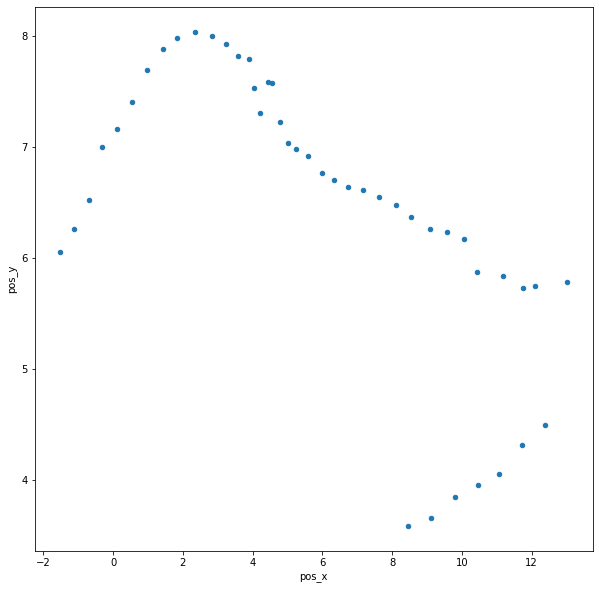

In [161]:
df_1.plot("pos_x", "pos_y", kind = "scatter")

<AxesSubplot:xlabel='pos_x', ylabel='pos_y'>

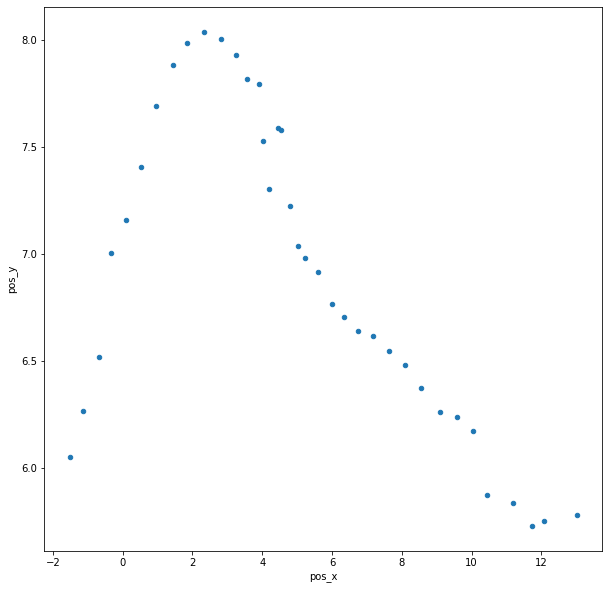

In [162]:
df_2 = df[df["agent_id"].isin([2])]
df_2.plot("pos_x", "pos_y", kind = "scatter")

In [170]:
multi_trajs = df.groupby("agent_id")

In [171]:
list(multi_trajs)

[(1,
     agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
  0         1   8.456844  3.588066  1.671714  0.176292       52.0
  1         1   9.125530  3.658583  1.662877  0.326723       52.4
  2         1   9.787146  3.849445  1.683334  0.371084       52.8
  3         1  10.472197  3.955450  1.598568  0.264795       53.2
  4         1  11.066000  4.061280  1.574526  0.456390       53.6
  6         1  11.731818  4.320563  1.644127  0.544391       54.0
  8         1  12.381302  4.496793  1.623709  0.440576       54.4),
 (2,
       agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
  5           2  13.017548  5.782591 -2.324444 -0.076606       53.6
  7           2  12.087770  5.751949 -1.589052 -0.065971       54.0
  9           2  11.746306  5.729815 -1.140766  0.105373       54.4
  10          2  11.175158  5.836247 -1.640021  0.179235       54.8
  11          2  10.434290  5.873203 -1.406129  0.419050       55.2
  13          2  10.050254  6.171487 -1.078742  0.45

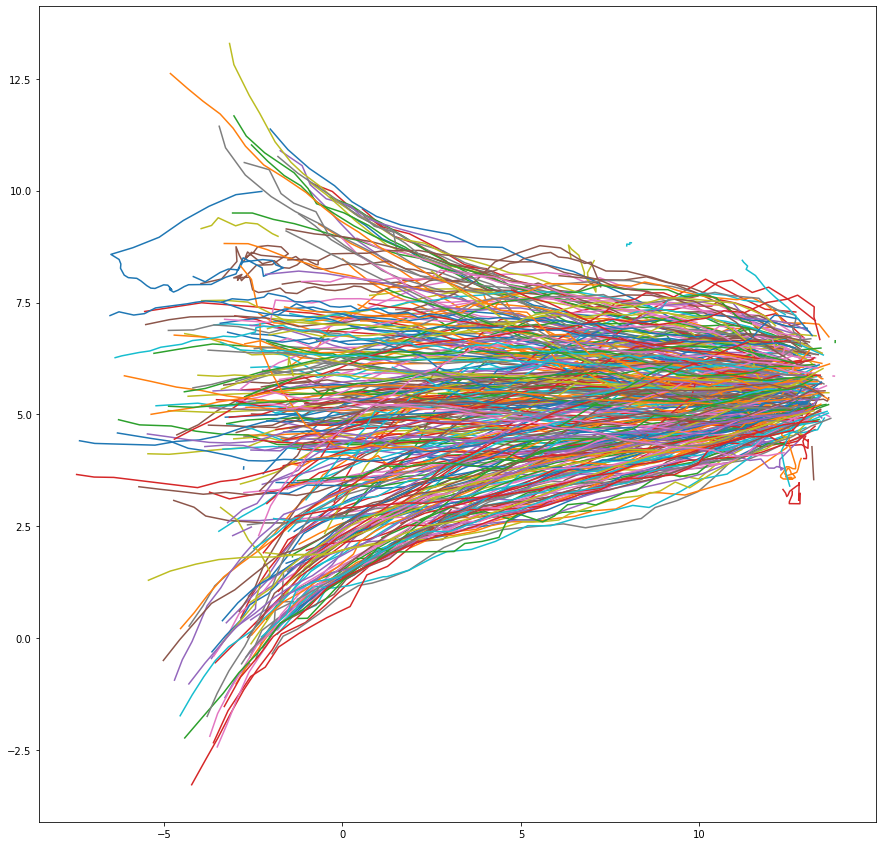

In [206]:
fig, ax  = plt.subplots()
ax.margins(0.05)
i = 0
for name, group in multi_trajs:
#     if i == 5:
#         break
    ax.plot(group.pos_x, group.pos_y, ms=1, label=name)
    i+=1
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()